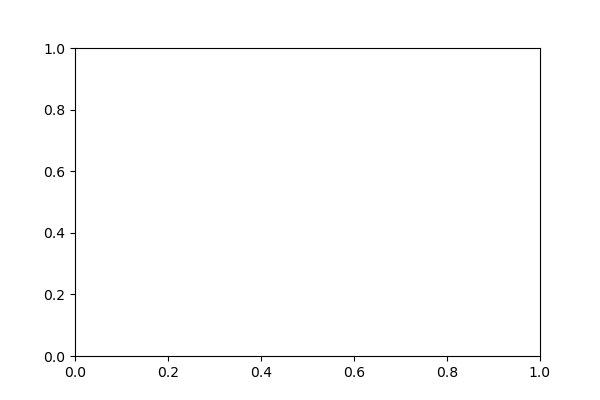

In [5]:
# %%capture
# %matplotlib widget

import matplotlib
import markdown 
from ipywidgets import widgets, HTML

from velocity_widget import ITSLIVE

matplotlib.rcParams['figure.figsize'] = [6, 4]

velocity_widget = ITSLIVE()

In [2]:
html_title = markdown.markdown("""

<div>
    <h1><center><a href="https://its-live.jpl.nasa.gov/"><img src="https://its-live-data.s3.amazonaws.com/documentation/ITS_LIVE_logo.png" height="80"/></a></center></h1>
    <h1><center>Global Glacier Velocity Point Data Access</center></h1>
</div>

***


<b>Authors</b>: Mark Fahnestock, Alex S. Gardner, Luis Lopez, Ted Scambos, Maria Liukis, Chad A. Greene, Joseph H. Kennedy


***

""")


html_instructions = markdown.markdown(""" This notebook allows you to select a set of point locations on a Leaflet-based global map, fetch all available ITS_LIVE glacier velocities for the locations, and plot the results.
Select the points by double-clicking on the map - click and drag on the map to pan the field of view. Once points are chosen, hit "Make Plot" (bottom right corner) to produce a plot.

You can drag individual points after they are placed to relocate them, and then "Make Plot" again. Click "Clear Points" to start over.
Underling data is stored on AWS S3 as Zarr datacubes and is accessed without an intermediate server. Glacier velocities in the "All Satellite" datacube collection are derived from all available Landsat 8, Sentinel-1A/B, Sentinel-2A/B imagery, while they are limited to Landsat 8 for now in the global dataset.

Please refer to the <b>[project website](https://its-live.jpl.nasa.gov/)</b> for further product infomation and for appraopriate data citation.
""")


title = HTML(html_title)
instructions = widgets.Accordion(children=[HTML(html_instructions)], selected_index=None)
instructions.set_title(0,title="Instructions")

In [3]:

# If this congiguration changes we need to rerun the cell.
config = { 
    "plot": "v", # or other ITS_LIVE variables: vx, vy ...
    "min_separation_days": 1,
    "max_separation_days": 90,
    "color_by": "points", # valid values: satellite, points
    "verbose": False # print operations
}

velocity_widget.set_config(config)
# If we have Jupyterlab we can render this using the Sidecar widget


dates_range = widgets.SelectionRangeSlider(
    options=[i for i in range(120)],
    index=(1, 90),
    continuous_update=False,
    description='Separation Range (days): ',
    orientation='horizontal',
    layout={'width': '90%',
            'display': 'flex'},
    style={'description_width': 'initial'})

variables =  widgets.Dropdown(
    options=['v', 'v_error', 'vx', 'vy'],
    description='Variable to Plot: ',
    disabled=False,
    value='v',
    layout={'width': '90%',
            'display': 'flex'},
    style={'description_width': 'initial'})

plot_type =  widgets.Dropdown(
    options=['points', 'satellite'],
    description='Plot By: ',
    disabled=False,
    value='points',
    layout={'width': '90%',
            'display': 'flex'},
    style={'description_width': 'initial'})

def update_variable(change):
        if change['type'] == 'change' and change['name'] == 'value':
            config["plot"] = variables.value
            velocity_widget.set_config(config)
            
def update_range(change):
        if change['type'] == 'change' and change['name'] == 'value':
            start, end = change['new']
            config["min_separation_days"] = start
            config["max_separation_days"] = end
            velocity_widget.set_config(config)
            
def update_plottype(change):
        if change['type'] == 'change' and change['name'] == 'value':
            config["color_by"] = plot_type.value
            velocity_widget.set_config(config)

dates_range.observe(update_range, 'value')
plot_type.observe(update_plottype, 'value')
variables.observe(update_variable, 'value')

layout = widgets.Layout(align_items='stretch',
                        display='flex',
                        flex_flow='row wrap',
                        border='none',
                        grid_template_columns="repeat(auto-fit, minmax(1400px, 1fr))",
                        width='100%',
                        height='100%')

plot = widgets.Accordion(children=[velocity_widget.fig.canvas])
plot.set_title(0, "Velocity Plot")

widgets.GridBox([widgets.VBox([title, plot, instructions], layout=widgets.Layout(width="50%", min_width="640px")),
                 widgets.VBox([velocity_widget.map, dates_range, variables, plot_type], layout=widgets.Layout(width="48%", min_width="640px"))],
                 layout=layout)

GridBox(children=(VBox(children=(HTML(value='<div>\n    <h1><center><a href="https://its-live.jpl.nasa.gov/"><…